In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('C:/Users/hr157/Downloads/archive (2)/Unemployment_Rate_upto_11_2020.csv')
print(df.head())
print(df.columns)


           Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-01-2020          M                              5.48   
1  Andhra Pradesh   29-02-2020          M                              5.83   
2  Andhra Pradesh   31-03-2020          M                              5.79   
3  Andhra Pradesh   30-04-2020          M                             20.51   
4  Andhra Pradesh   31-05-2020          M                             17.43   

    Estimated Employed   Estimated Labour Participation Rate (%) Region.1  \
0             16635535                                     41.02    South   
1             16545652                                     40.90    South   
2             15881197                                     39.18    South   
3             11336911                                     33.10    South   
4             12988845                                     36.46    South   

   longitude  latitude  
0    15.9129     79.74  
1    15.9129

#🔹 1. Check the Actual Column Names

In [11]:
df.columns = df.columns.str.strip()

In [12]:
print(df.columns.tolist())

['State', 'Date', 'Frequency', 'Unemployment Rate', 'Estimated Employed', 'Estimated Labour Participation Rate (%)', 'Region.1', 'longitude', 'latitude']


#Fix: Specify the correct format
If you know your date format is DD-MM-YYYY, do this:

In [13]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y', errors='coerce')


#Rename it for Simplicity
#Rename it to 'Unemployment Rate':

In [19]:
df.rename(columns={'Estimated Unemployment Rate (%)': 'Unemployment Rate'}, inplace=True)


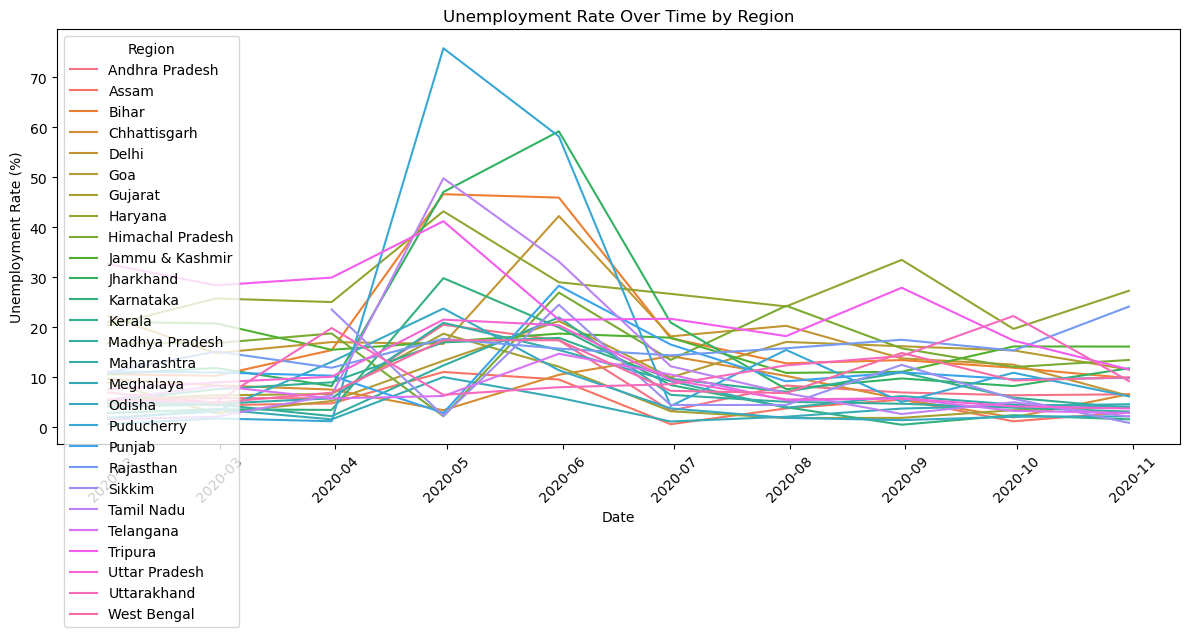

In [22]:

# Clean and rename columns
df.columns = df.columns.str.strip()
df.rename(columns={'Estimated Unemployment Rate (%)': 'Unemployment Rate'}, inplace=True)

# Convert Date column properly
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')

# Strip region names
df['Region_Name'] = df['Region'].astype(str).str.strip()

# Drop missing data
df.dropna(subset=['Date', 'Unemployment Rate', 'Region'], inplace=True)

# Plot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Date', y='Unemployment Rate', hue='Region')
plt.title("Unemployment Rate Over Time by Region")
plt.xlabel("Date")
plt.ylabel("Unemployment Rate (%)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


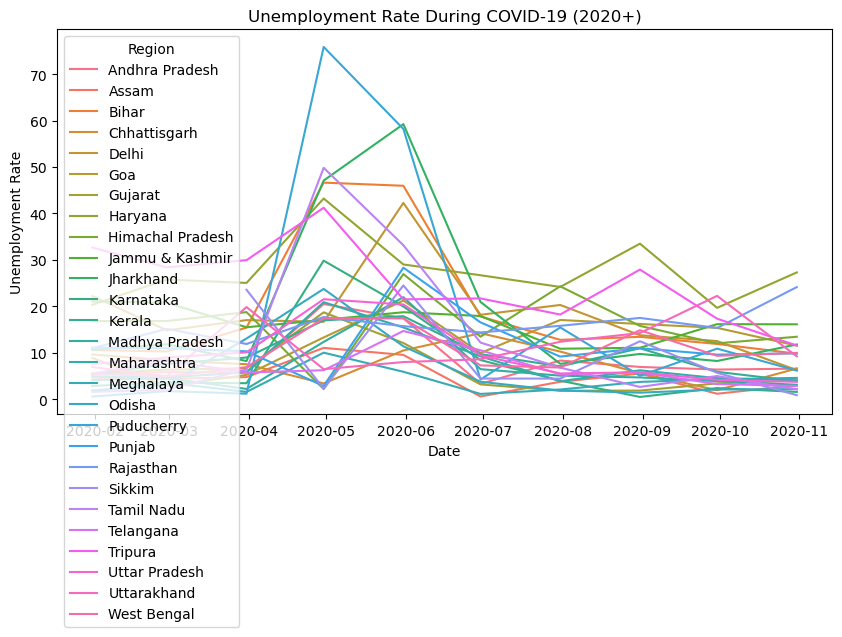

In [23]:
# Filter data for 2020 onwards
covid_data = df[df['Date'] >= '2020-01-01']

plt.figure(figsize=(10,5))
sns.lineplot(data=covid_data, x='Date', y='Unemployment Rate', hue='Region')
plt.title("Unemployment Rate During COVID-19 (2020+)")
plt.show()

#Filter COVID Period (e.g., March 2020 onwards)

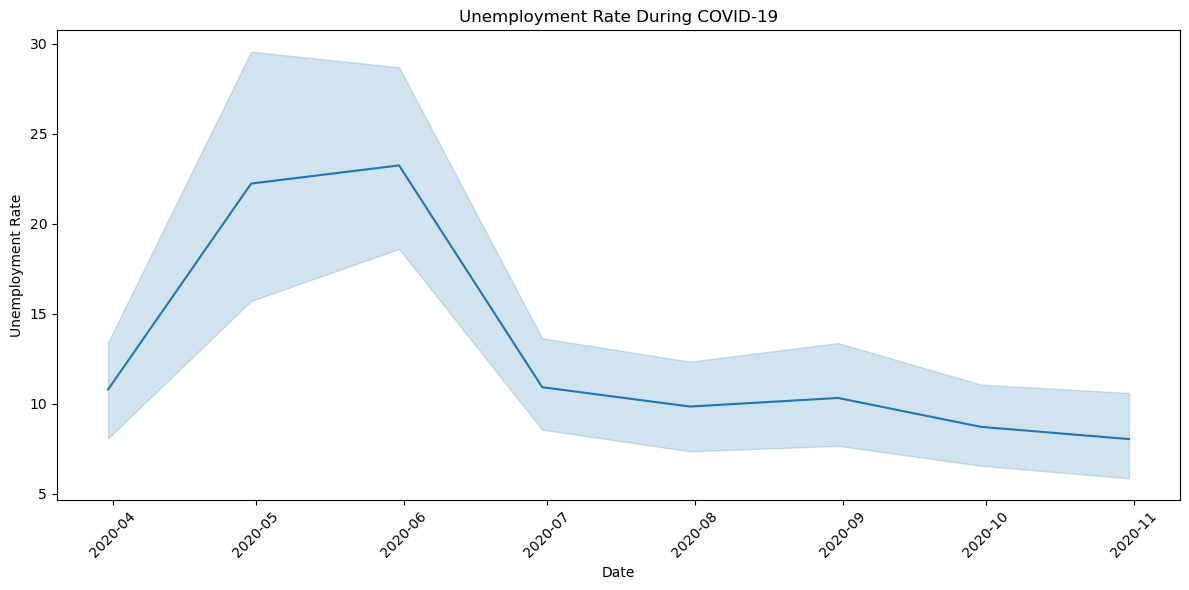

Pre-COVID Avg Unemployment: 9.23%
Post-COVID Avg Unemployment: 12.96%


In [27]:
covid_df = df[df['Date'] >= '2020-03-01']
plt.figure(figsize=(12,6))
sns.lineplot(data=covid_df, x='Date', y='Unemployment Rate')
plt.title('Unemployment Rate During COVID-19')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

pre_covid = df[df['Date'] < '2020-03-01']['Unemployment Rate'].mean()
post_covid = df[df['Date'] >= '2020-03-01']['Unemployment Rate'].mean()

print(f"Pre-COVID Avg Unemployment: {pre_covid:.2f}%")
print(f"Post-COVID Avg Unemployment: {post_covid:.2f}%")



# Average Monthly Unemployment Rate

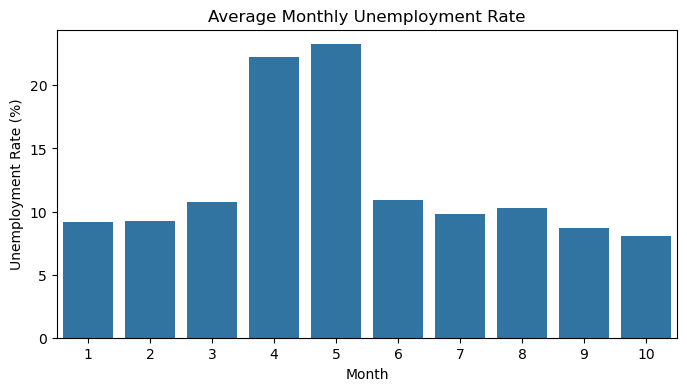

In [28]:
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

monthly_trend = df.groupby('Month')['Unemployment Rate'].mean()

plt.figure(figsize=(8,4))
sns.barplot(x=monthly_trend.index, y=monthly_trend.values)
plt.title("Average Monthly Unemployment Rate")
plt.xlabel("Month")
plt.ylabel("Unemployment Rate (%)")
plt.show()